In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


In [ ]:
#Noramlizing pixel valeus
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=67489fb2a0ab5198507c871b32b6a2571d2fb30bec97568634eea1dc905ebabc
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_valid = to_categorical(y_valid,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range=15,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False
)
datagen.fit(x_train)

In [ ]:
base_hidden_units = 32
#L2 regularization hyperparameter
weight_decay = 1e-4

model = Sequential()
# CONV1
model.add(Conv2D(base_hidden_units, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay),
input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
# CONV2
model.add(Conv2D(base_hidden_units, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# CONV3
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# CONV4
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# CONV5
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# CONV6
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

In [ ]:
batch_size = 256
epochs = 125
checkpointer = ModelCheckpoint(filepath='model.100epochs.hdf5', verbose=1,save_best_only=True )

optimizer = keras.optimizers.Adam(learning_rate=0.0001,weight_decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                              callbacks=[checkpointer],
                              steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs,
                              verbose=2,
                              validation_data=(x_valid, y_valid))

Epoch 1/125


<ipython-input-23-8992cb3c8bbd>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train,



Epoch 1: val_loss improved from inf to 2.41893, saving model to model.100epochs.hdf5
175/175 - 41s - loss: 3.0025 - accuracy: 0.2515 - val_loss: 2.4189 - val_accuracy: 0.1286 - 41s/epoch - 236ms/step
Epoch 2/125


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.41893 to 1.82707, saving model to model.100epochs.hdf5
175/175 - 30s - loss: 2.2751 - accuracy: 0.3349 - val_loss: 1.8271 - val_accuracy: 0.3476 - 30s/epoch - 169ms/step
Epoch 3/125

Epoch 3: val_loss improved from 1.82707 to 1.47414, saving model to model.100epochs.hdf5
175/175 - 27s - loss: 2.0039 - accuracy: 0.3729 - val_loss: 1.4741 - val_accuracy: 0.4894 - 27s/epoch - 157ms/step
Epoch 4/125

Epoch 4: val_loss improved from 1.47414 to 1.45574, saving model to model.100epochs.hdf5
175/175 - 24s - loss: 1.8585 - accuracy: 0.4060 - val_loss: 1.4557 - val_accuracy: 0.5010 - 24s/epoch - 136ms/step
Epoch 5/125

Epoch 5: val_loss improved from 1.45574 to 1.44302, saving model to model.100epochs.hdf5
175/175 - 32s - loss: 1.7585 - accuracy: 0.4323 - val_loss: 1.4430 - val_accuracy: 0.4982 - 32s/epoch - 180ms/step
Epoch 6/125

Epoch 6: val_loss improved from 1.44302 to 1.41926, saving model to model.100epochs.hdf5
175/175 - 23s - loss: 1.6915 - accuracy: 0

In [ ]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 8ms/step - loss: 0.5449 - accuracy: 0.8310

Test result: 83.100 loss: 0.545


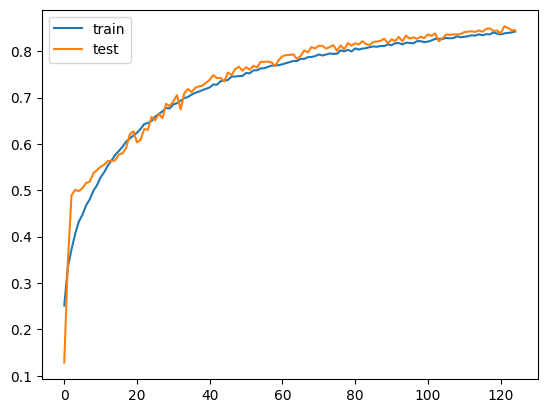

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()